### Bike demand prediction
Build a model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [168]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [169]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [170]:
# checking the shape of the current data
day.shape

(730, 16)

In [171]:
# checking the columns and their datatypes along with null values
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [172]:
# checking the statistical descriptive metrices
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [173]:
#checking the count of values for season column
day['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [174]:
# For seasons, it is not appropriate to have numerical values. Converting them into string
day['season'] = day['season'].map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
day['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [175]:
#checking the count of values for weathersit column
day['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64


Need to convert weathersit coluns into string values.
Here are the actual meaning of each numerical value
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Converting it to simple one word string
        1:Clear weather,
        2:Mist  weather,
        3:Light  weather
        4:Heavy  weather
Added weather as appended string because later, it may be used as dummy variable. 

In [176]:

day['weathersit'] = day['weathersit'].map({1: "Clear weather", 2: "Mist weather", 3: "Light weather", 4: "Heavy weather"})
day['weathersit'].value_counts()

weathersit
Clear weather    463
Mist weather     246
Light weather     21
Name: count, dtype: int64

In [177]:
# checking yr column
day['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [178]:
#converting yr column into 2018 and 2019 respectively as per data dictionary
day['yr'] = day['yr'].map({0:'2018',1:'2019'})
day['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [179]:
#checking dteday column
day['dteday'].value_counts()

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64

In [180]:
# removing casual and registered columns as those are counted in cnt as well
day = day.drop(columns=['casual','registered'],axis=1)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,2018,1,0,6,0,Mist weather,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,2018,1,0,0,0,Mist weather,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,2018,1,0,1,1,Clear weather,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,2018,1,0,2,1,Clear weather,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,2018,1,0,3,1,Clear weather,9.305237,11.46350,43.6957,12.522300,1600


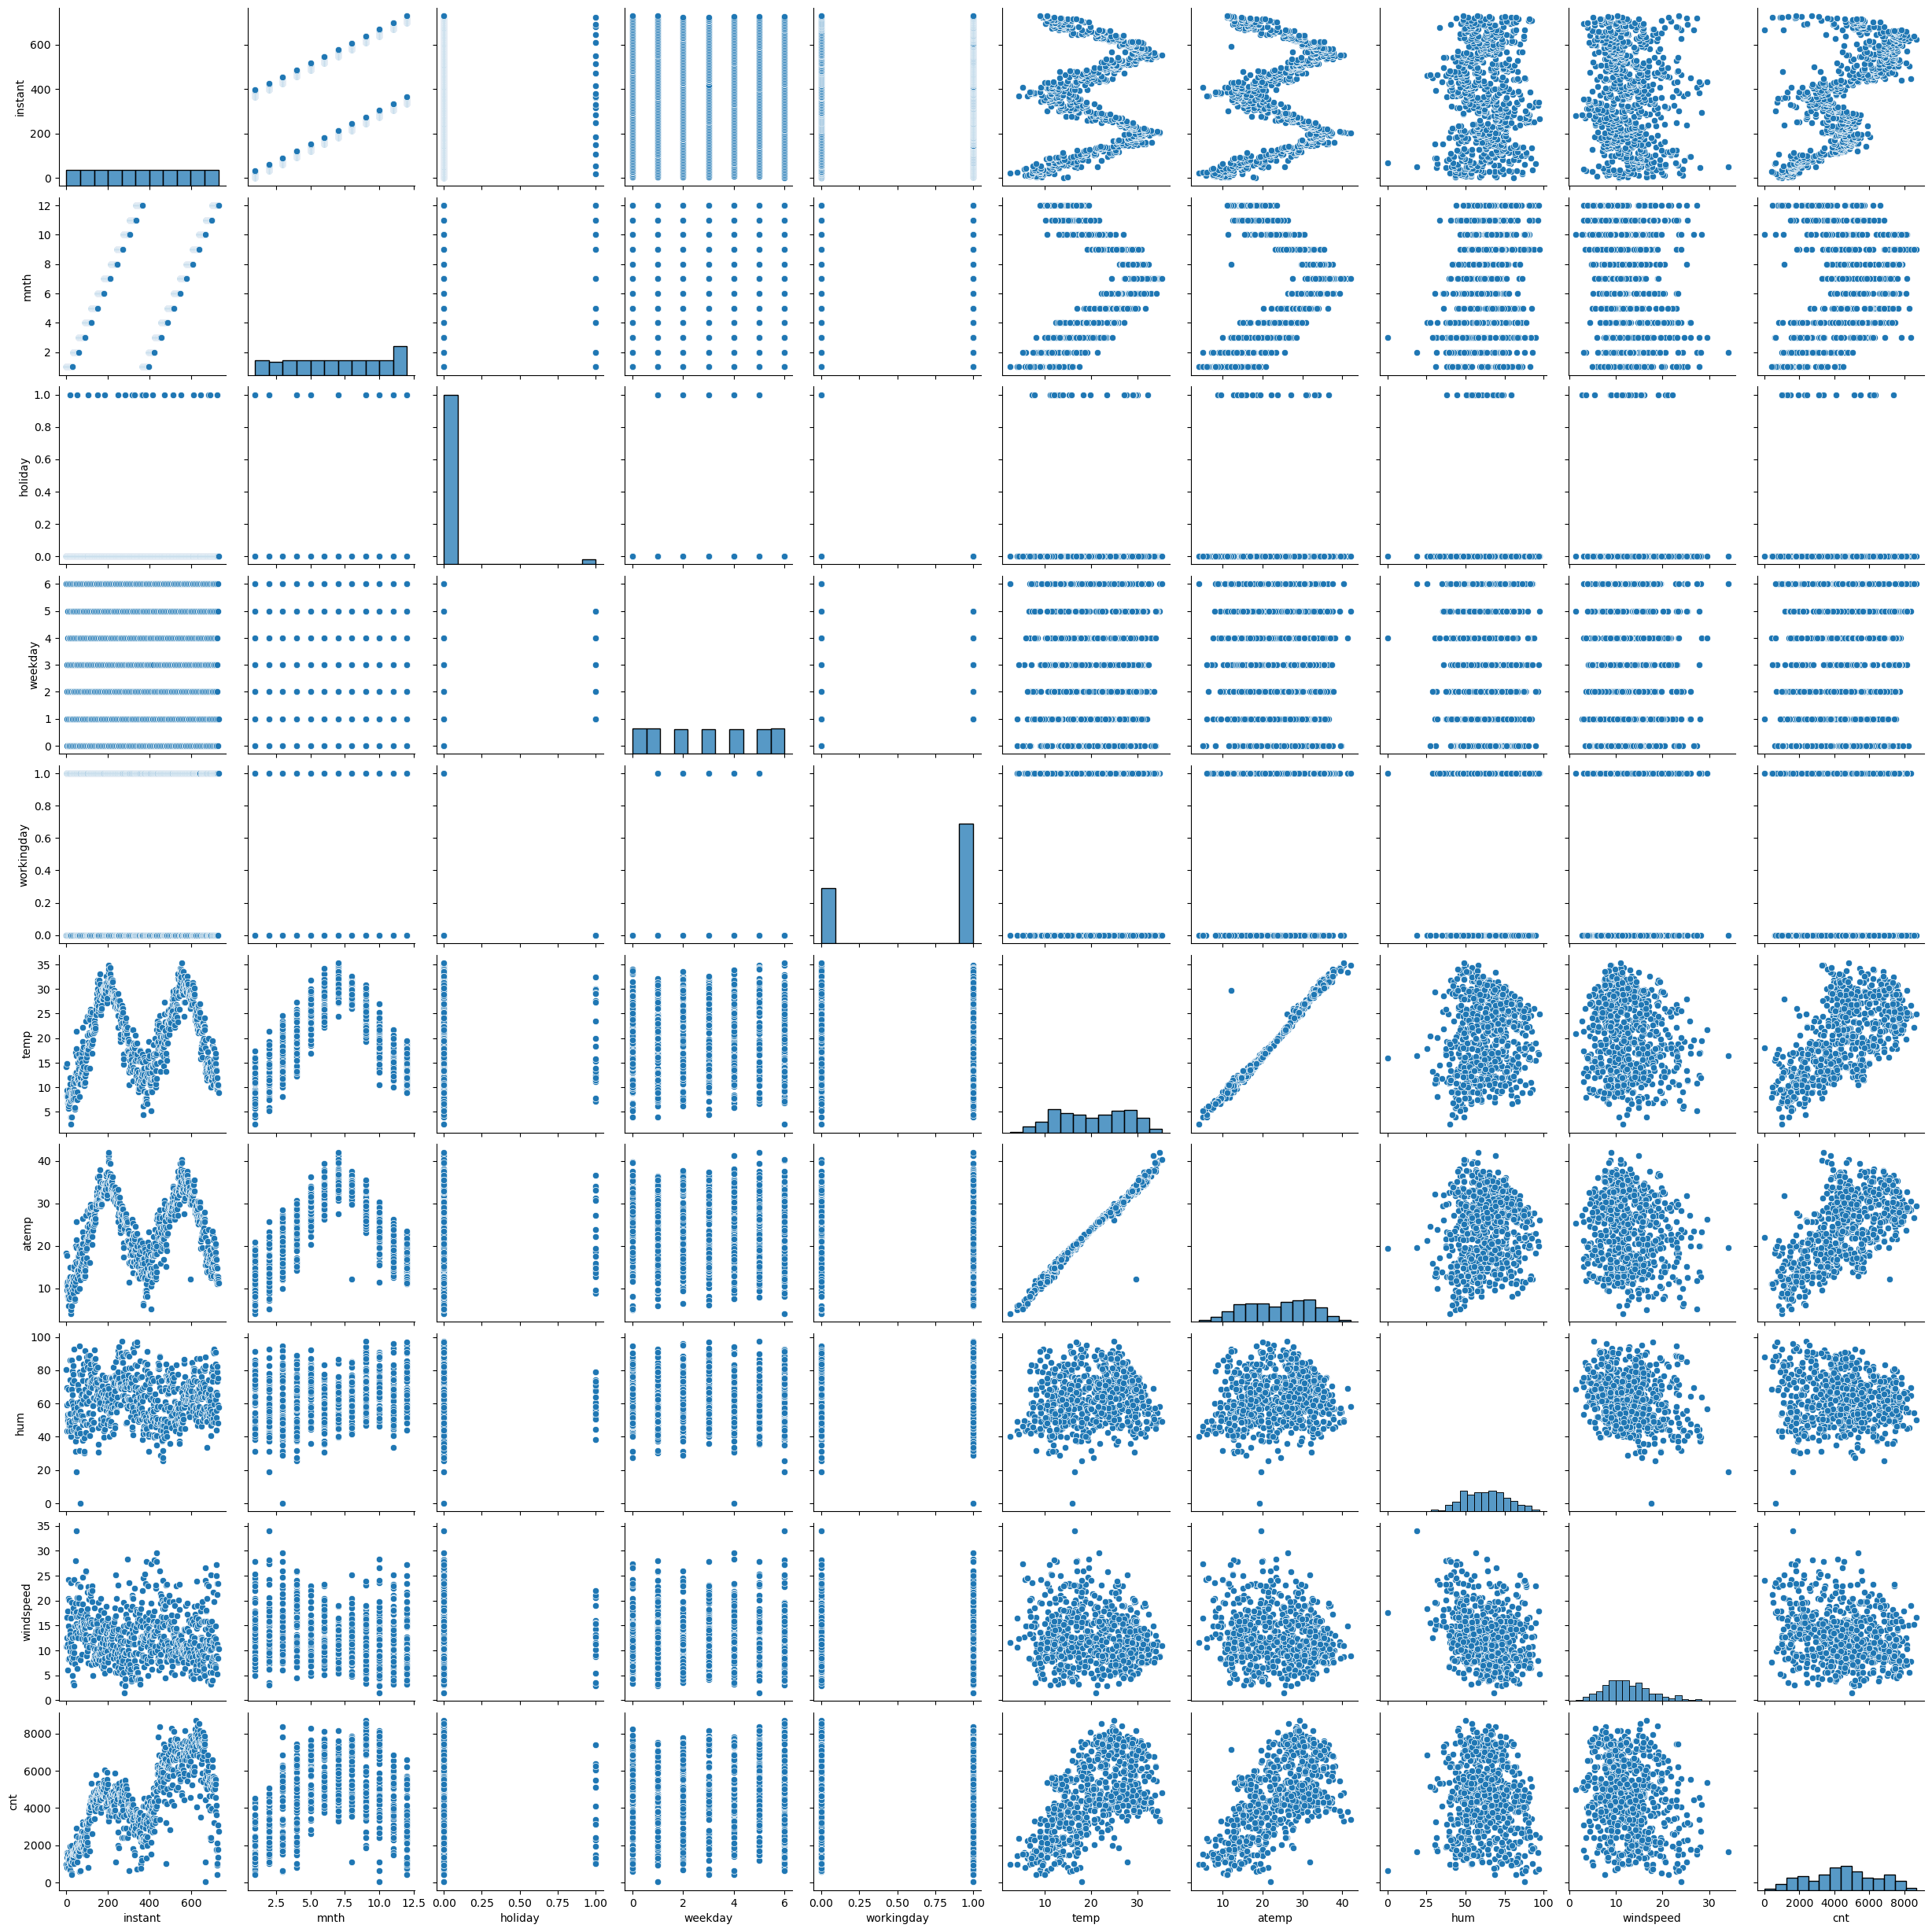

In [181]:
sns.pairplot(day)
plt.show()

<Axes: xlabel='yr', ylabel='cnt'>

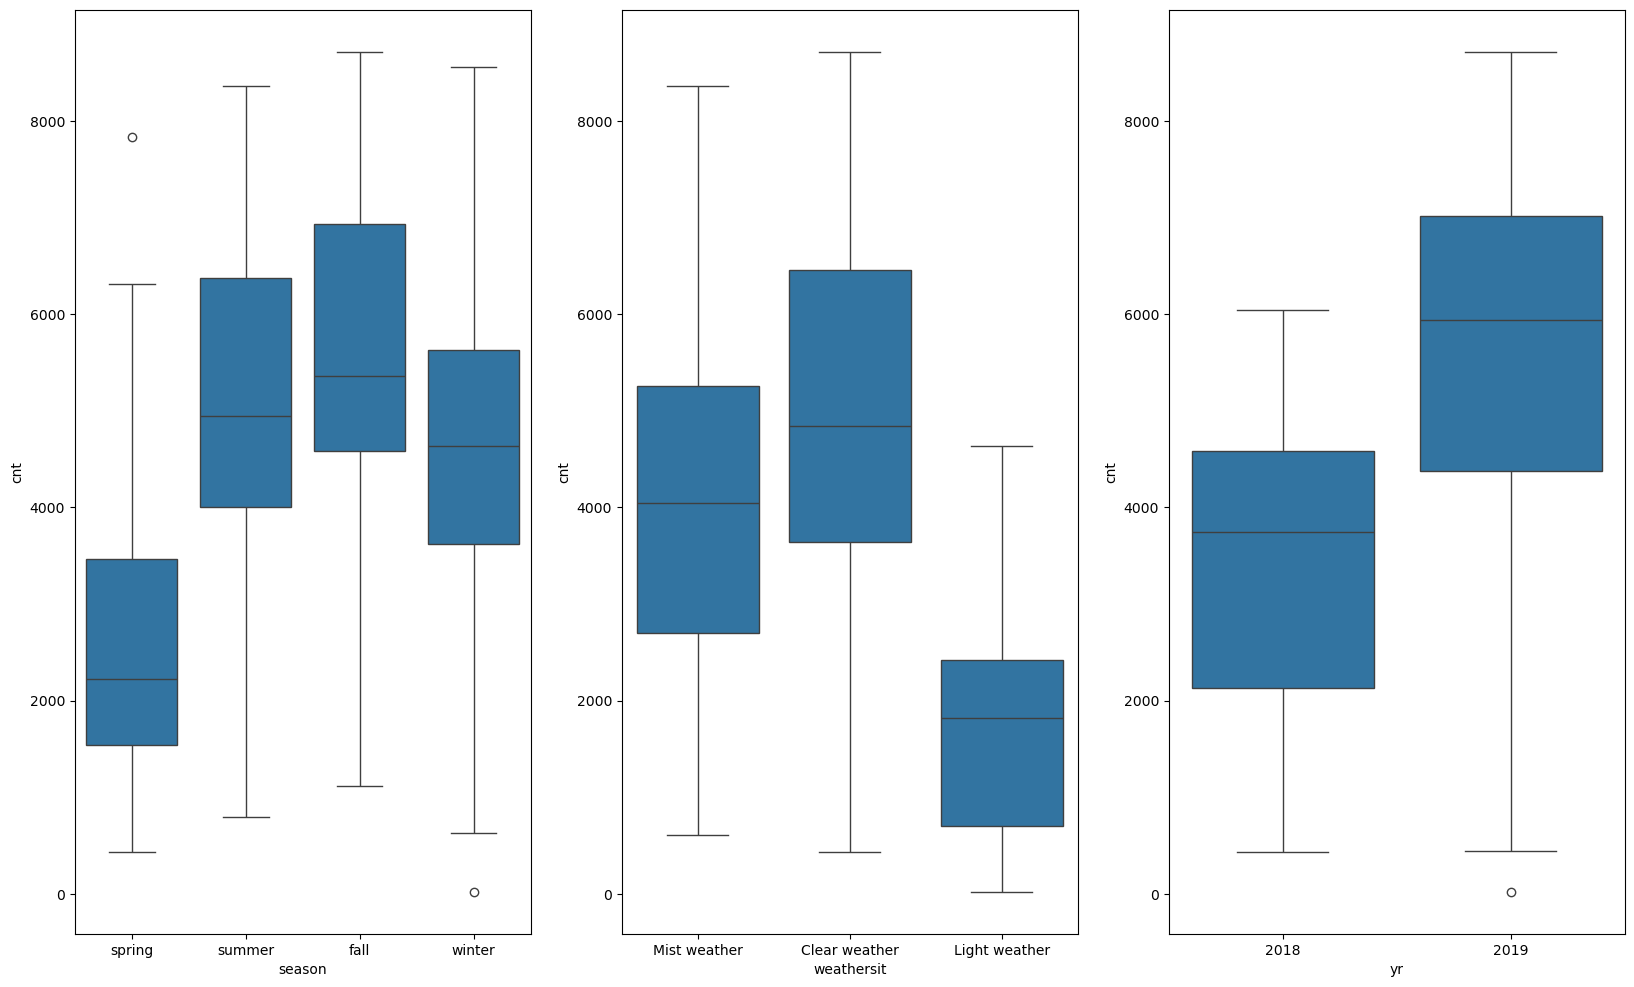

In [182]:
# visualizing the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x='season', y='cnt', data=day)
plt.subplot(1,3,2)
sns.boxplot(x='weathersit', y='cnt', data=day)
plt.subplot(1,3,3)
sns.boxplot(x='yr', y='cnt', data=day)


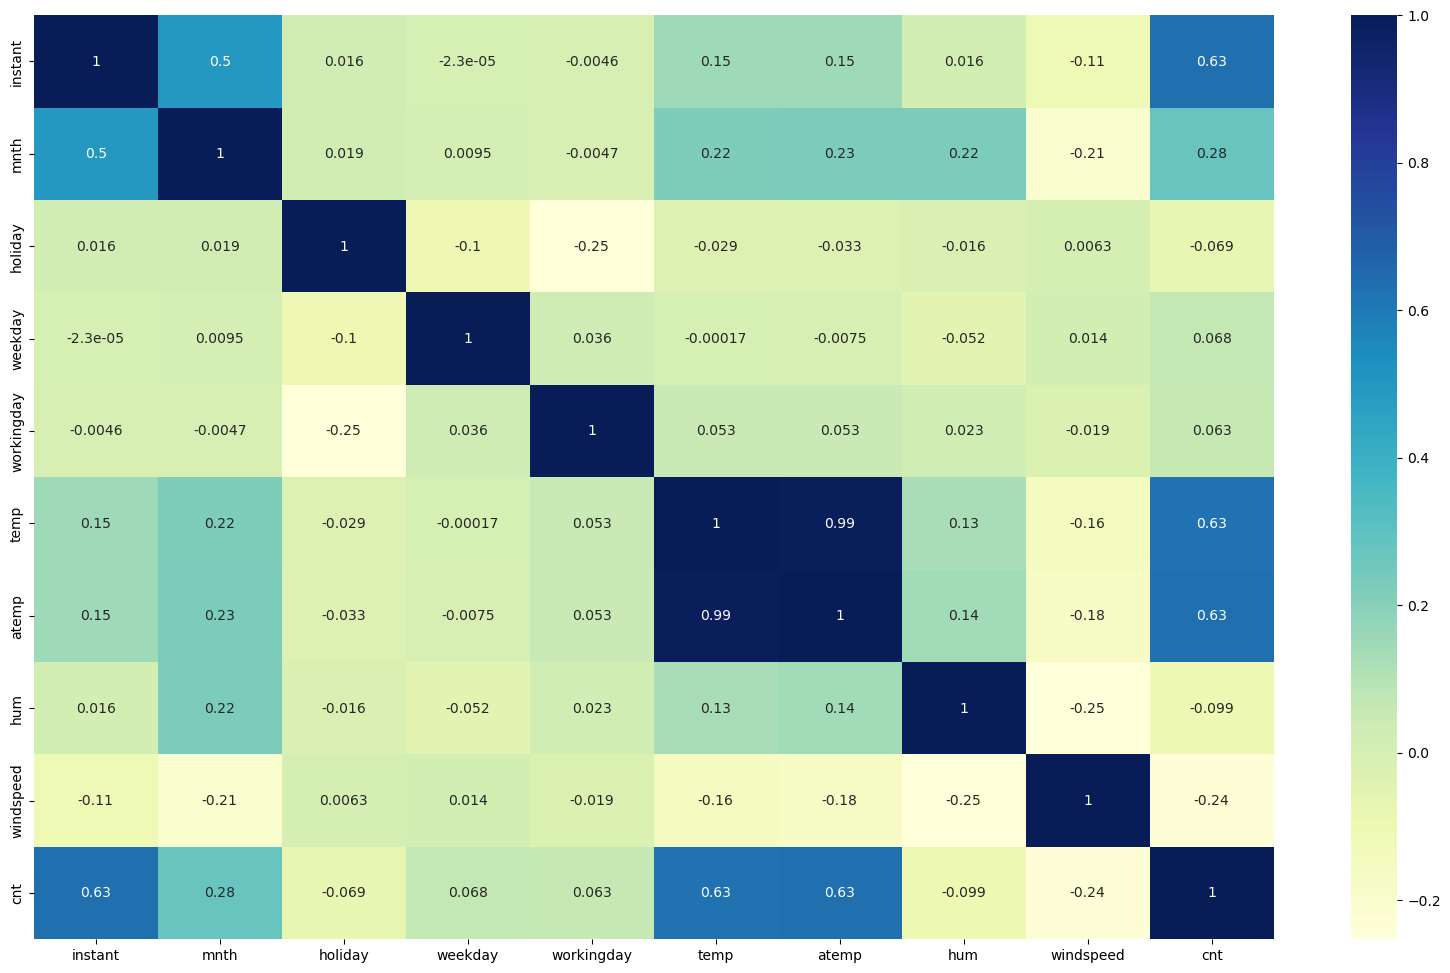

In [183]:
# checking the correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(day.corr(numeric_only=True),annot=True, cmap='YlGnBu')
plt.show()

In [184]:
# Creating dummy vars for season
# dropping a redundant dummy var
season = pd.get_dummies(day['season'], dtype=int, drop_first=True)
season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [185]:
day = pd.concat([day, season], axis=1)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,1,01-01-2018,spring,2018,1,0,6,0,Mist weather,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,2,02-01-2018,spring,2018,1,0,0,0,Mist weather,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,3,03-01-2018,spring,2018,1,0,1,1,Clear weather,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,4,04-01-2018,spring,2018,1,0,2,1,Clear weather,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,5,05-01-2018,spring,2018,1,0,3,1,Clear weather,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [186]:
day = day.drop('season',axis=1)
day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,1,01-01-2018,2018,1,0,6,0,Mist weather,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,2,02-01-2018,2018,1,0,0,0,Mist weather,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,3,03-01-2018,2018,1,0,1,1,Clear weather,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,4,04-01-2018,2018,1,0,2,1,Clear weather,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,5,05-01-2018,2018,1,0,3,1,Clear weather,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [187]:
# Creating dummy vars for weathersit
# dropping a redundant dummy var
weathersit = pd.get_dummies(day['weathersit'], dtype=int, drop_first=True)
day = pd.concat([day, weathersit], axis=1)
day = day.drop('weathersit',axis=1)
day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light weather,Mist weather
0,1,01-01-2018,2018,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2,02-01-2018,2018,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,3,03-01-2018,2018,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,4,04-01-2018,2018,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,5,05-01-2018,2018,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [188]:
# Creating dummy vars for yr
# dropping a redundant dummy var
yr = pd.get_dummies(day['yr'], dtype=int, drop_first=True)
day = pd.concat([day, yr], axis=1)
day = day.drop('yr',axis=1)
day.head()

,instant,dteday,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light weather,Mist weather,2019
0,1,01-01-2018,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0
1,2,02-01-2018,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0
2,3,03-01-2018,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0
3,4,04-01-2018,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0
4,5,05-01-2018,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0


In [189]:
#checking nulls
day.isnull().sum()

instant          0
dteday           0
mnth             0
holiday          0
weekday          0
workingday       0
temp             0
atemp            0
hum              0
windspeed        0
cnt              0
spring           0
summer           0
winter           0
Light weather    0
Mist weather     0
2019             0
dtype: int64

In [190]:
# checking other variables
day['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [191]:
day['workingday'].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [192]:
day['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [193]:
day['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [194]:
# Creating dummy vars for mnth
# dropping a redundant dummy var
day['month_mmm'] = pd.to_datetime(day['mnth'], format='%m').dt.strftime('%b')
month = pd.get_dummies(day['month_mmm'], dtype=int, drop_first=True)
day = pd.concat([day, month], axis=1)
day = day.drop(columns=['month_mmm','mnth'],axis=1)
day.head()


,instant,dteday,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,01-01-2018,0,6,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [195]:
# Creating dummy vars for weekday
# dropping a redundant dummy var
weekday_map = {
       0: 'Monday',
       1: 'Tuesday',
       2: 'Wednesday',
       3: 'Thursday',
       4: 'Friday',
       5: 'Saturday',
       6: 'Sunday'
   }
day['weekday'] = day['weekday'].map(weekday_map)
weekday = pd.get_dummies(day['weekday'], dtype=int, drop_first=True)
day = pd.concat([day, weekday], axis=1)
day = day.drop(columns=['weekday'],axis=1)
day.head()


,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,1,0,0,0
1,2,02-01-2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,1,0,0,0,0,0
2,3,03-01-2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,1,0
3,4,04-01-2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,1
4,5,05-01-2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [196]:
#dropping dteday and instant columns as they will not contribute much in model building
day = day.drop(columns=['instant','dteday'],axis=1)
day.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting the data

In [197]:
# Splitting the data into training dataset and test dataset
df_train, df_test = train_test_split(day, train_size=0.7,random_state=42)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Scaling the features


In [198]:
# Create an object of MinMaxScalar
scalar = MinMaxScaler()
# non num columns are already dropped so taking the train set as it is

#There will be 3 methods in sklearn MinMaxScalar
# 1. fit() - Learns Xmin and Xmax
# 2. transform() - Calculates (X-Xmin)/(Xmax - Xmin)
# 3. fit_transform() - Does both calculations
df_train = pd.DataFrame(scalar.fit_transform(df_train),columns=df_train.columns)
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1.0,0.0,0.403972,0.404998,0.731215,0.419004,0.609320,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.717562,0.685963,0.509660,0.708724,0.554026,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.331287,0.326273,0.785745,0.415925,0.088253,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.745598,0.682653,0.817947,0.110593,0.862127,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.703024,0.637937,0.899098,0.839562,0.439696,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [199]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.027451,0.668627,0.551313,0.526919,0.654203,0.415045,0.497429,0.231373,0.258824,0.24902,...,0.092157,0.090196,0.090196,0.090196,0.152941,0.129412,0.150980,0.141176,0.149020,0.131373
std,0.163554,0.471169,0.227237,0.212992,0.143788,0.185760,0.234207,0.422124,0.438419,0.43287,...,0.289531,0.286744,0.286744,0.286744,0.360284,0.335985,0.358381,0.348545,0.356457,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354526,0.354454,0.544033,0.281934,0.344772,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.575824,0.564951,0.660798,0.384737,0.501871,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.745338,0.698389,0.756977,0.526489,0.677080,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


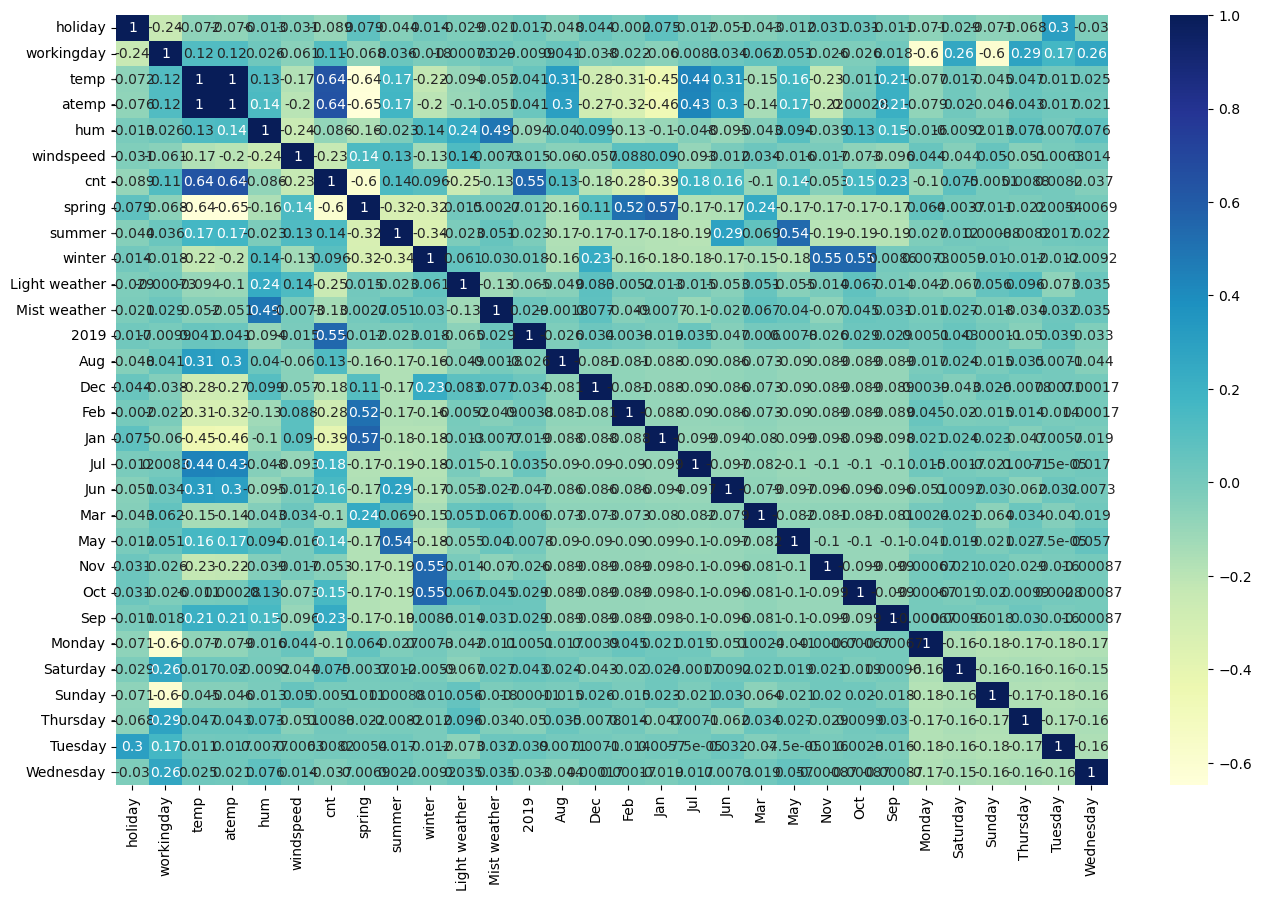

In [200]:
#HeatMap
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

### Building the Model

In [201]:
# Identify X train and y train
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Light weather,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1.0,0.0,0.403972,0.404998,0.731215,0.419004,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.717562,0.685963,0.509660,0.708724,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.331287,0.326273,0.785745,0.415925,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.745598,0.682653,0.817947,0.110593,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.703024,0.637937,0.899098,0.839562,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Using RFE as initial method to identify top 25 columns

In [202]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=25) # top 25
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [203]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light weather', True, 1),
 ('Mist weather', True, 1),
 ('2019', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 4),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 2),
 ('Sunday', True, 1),
 ('Thursday', False, 5),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1)]

In [204]:
col = X_train.columns[rfe.support_]

In [205]:
X_train.columns[~rfe.support_]

Index(['Jan', 'Jun', 'Saturday', 'Thursday'], dtype='object')

In [206]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.7
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          4.02e-181
Time:                        21:01:17   Log-Likelihood:                 497.41
No. Observations:                 510   AIC:                            -944.8
Df Residuals:                     485   BIC:                            -839.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2392      0.035      6.817      0.000       0.170       0.308
holiday           0.0150      0.024      0.634      0.526      -0.031       0.061
workingday        0.0896      0.011      7.866      0.000       0.067       0.112
temp              0.1978      0.251      0.786      0.432      -0.296       0.692
atemp             0.2647      0.266      0.995      0.320      -0.258       0.787
hum              -0.1650      0.040     -4.091      0.000      -0.244      -0.086
windspeed        -0.1135      0.026     -4.414      0.000      -0.164      -0.063
spring           -0.1452      0.029     -5.037      0.000      -0.202      -0.089
summer            0.0104      0.025      0.413      0.680      -0.039       0.060
winter            0.0780      0.026      2.946      0.003       0.026       0.130
Light weather    -0.2280      0.028     -8.015      0.000      -0.284      -0.172
Mist weather     -0.0588      0.011     -5.325      0.000      -0.081      -0.037
2019              0.2359      0.008     27.896      0.000       0.219       0.252
Aug              -0.0109      0.027     -0.403      0.687      -0.064       0.042
Dec              -0.0398      0.024     -1.649      0.100      -0.087       0.008
Feb               0.0149      0.020      0.753      0.452      -0.024       0.054
Jul              -0.0434      0.026     -1.639      0.102      -0.095       0.009
Mar               0.0551      0.019      2.857      0.004       0.017       0.093
May               0.0315      0.018      1.775      0.076      -0.003       0.066
Nov              -0.0534      0.030     -1.778      0.076      -0.112       0.006
Oct               0.0367      0.030      1.234      0.218      -0.022       0.095
Sep               0.0742      0.025      2.988      0.003       0.025       0.123
Monday            0.0436      0.014      3.120      0.002       0.016       0.071
Sunday            0.0910      0.013      6.770      0.000       0.065       0.117
Tuesday          -0.0138      0.013     -1.052      0.293      -0.040       0.012
Wednesday        -0.0217      0.013     -1.643      0.101      -0.048       0.004
==============================================================================
Omnibus:                       83.072   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.818
Skew:                          -0.849   Prob(JB):                     4.96e-43
Kurtosis:                       5.506   Cond. No.                     1.13e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-29. This might indicate that there are
strong multicollinearity problems or that the design ma

In [207]:
# Calculating VIF before deciding which columns to drop
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
22,Monday,inf
1,holiday,inf
2,workingday,inf
23,Sunday,inf
3,temp,189.877398
4,atemp,186.528350
7,spring,8.609402
9,winter,7.644454
8,summer,7.045850
19,Nov,4.315028


In [208]:
#dropping holiday as it has high VIF as well p-value
X_train_rfe = X_train_rfe.drop('holiday',axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.7
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          4.02e-181
Time:                        21:01:17   Log-Likelihood:                 497.41
No. Observations:                 510   AIC:                            -944.8
Df Residuals:                     485   BIC:                            -839.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2542      0.051      4.977      0.000       0.154       0.355
workingday        0.0746      0.027      2.750      0.006       0.021       0.128
temp              0.1978      0.251      0.786      0.432      -0.296       0.692
atemp             0.2647      0.266      0.995      0.320      -0.258       0.787
hum              -0.1650      0.040     -4.091      0.000      -0.244      -0.086
windspeed        -0.1135      0.026     -4.414      0.000      -0.164      -0.063
spring           -0.1452      0.029     -5.037      0.000      -0.202      -0.089
summer            0.0104      0.025      0.413      0.680      -0.039       0.060
winter            0.0780      0.026      2.946      0.003       0.026       0.130
Light weather    -0.2280      0.028     -8.015      0.000      -0.284      -0.172
Mist weather     -0.0588      0.011     -5.325      0.000      -0.081      -0.037
2019              0.2359      0.008     27.896      0.000       0.219       0.252
Aug              -0.0109      0.027     -0.403      0.687      -0.064       0.042
Dec              -0.0398      0.024     -1.649      0.100      -0.087       0.008
Feb               0.0149      0.020      0.753      0.452      -0.024       0.054
Jul              -0.0434      0.026     -1.639      0.102      -0.095       0.009
Mar               0.0551      0.019      2.857      0.004       0.017       0.093
May               0.0315      0.018      1.775      0.076      -0.003       0.066
Nov              -0.0534      0.030     -1.778      0.076      -0.112       0.006
Oct               0.0367      0.030      1.234      0.218      -0.022       0.095
Sep               0.0742      0.025      2.988      0.003       0.025       0.123
Monday            0.0286      0.030      0.970      0.332      -0.029       0.087
Sunday            0.0760      0.030      2.572      0.010       0.018       0.134
Tuesday          -0.0138      0.013     -1.052      0.293      -0.040       0.012
Wednesday        -0.0217      0.013     -1.643      0.101      -0.048       0.004
==============================================================================
Omnibus:                       83.072   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.818
Skew:                          -0.849   Prob(JB):                     4.96e-43
Kurtosis:                       5.506   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
# Calculating VIF before deciding which columns to drop
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,189.877398
3,atemp,186.528350
0,const,152.058168
1,workingday,9.500253
6,spring,8.609402
8,winter,7.644454
7,summer,7.045850
21,Monday,6.581708
22,Sunday,6.523918
18,Nov,4.315028


In [210]:
#dropping temp as it has high VIF as well p-value
X_train_rfe = X_train_rfe.drop('temp',axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     117.6
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          4.98e-182
Time:                        21:01:17   Log-Likelihood:                 497.09
No. Observations:                 510   AIC:                            -946.2
Df Residuals:                     486   BIC:                            -844.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2579      0.051      5.072      0.000       0.158       0.358
workingday        0.0726      0.027      2.688      0.007       0.020       0.126
atemp             0.4715      0.040     11.930      0.000       0.394       0.549
hum              -0.1677      0.040     -4.175      0.000      -0.247      -0.089
windspeed        -0.1083      0.025     -4.362      0.000      -0.157      -0.059
spring           -0.1474      0.029     -5.142      0.000      -0.204      -0.091
summer            0.0076      0.025      0.304      0.761      -0.041       0.056
winter            0.0766      0.026      2.899      0.004       0.025       0.128
Light weather    -0.2252      0.028     -7.982      0.000      -0.281      -0.170
Mist weather     -0.0582      0.011     -5.285      0.000      -0.080      -0.037
2019              0.2360      0.008     27.926      0.000       0.219       0.253
Aug              -0.0100      0.027     -0.372      0.710      -0.063       0.043
Dec              -0.0423      0.024     -1.767      0.078      -0.089       0.005
Feb               0.0136      0.020      0.689      0.491      -0.025       0.052
Jul              -0.0436      0.026     -1.649      0.100      -0.096       0.008
Mar               0.0537      0.019      2.798      0.005       0.016       0.091
May               0.0319      0.018      1.802      0.072      -0.003       0.067
Nov              -0.0562      0.030     -1.885      0.060      -0.115       0.002
Oct               0.0344      0.030      1.164      0.245      -0.024       0.093
Sep               0.0739      0.025      2.978      0.003       0.025       0.123
Monday            0.0267      0.029      0.907      0.365      -0.031       0.084
Sunday            0.0739      0.029      2.512      0.012       0.016       0.132
Tuesday          -0.0146      0.013     -1.115      0.265      -0.040       0.011
Wednesday        -0.0212      0.013     -1.606      0.109      -0.047       0.005
==============================================================================
Omnibus:                       84.355   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.873
Skew:                          -0.860   Prob(JB):                     6.54e-44
Kurtosis:                       5.530   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
# Calculating VIF before deciding which columns to drop
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,150.780563
1,workingday,9.412969
5,spring,8.524607
7,winter,7.606654
6,summer,6.902429
20,Monday,6.534008
21,Sunday,6.471673
17,Nov,4.255270
18,Oct,4.186085
2,atemp,4.123498


In [212]:
#dropping summer as it has high VIF as well p-value
X_train_rfe = X_train_rfe.drop('summer',axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.2
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          4.64e-183
Time:                        21:01:18   Log-Likelihood:                 497.04
No. Observations:                 510   AIC:                            -948.1
Df Residuals:                     487   BIC:                            -850.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2652      0.045      5.922      0.000       0.177       0.353
workingday        0.0724      0.027      2.684      0.008       0.019       0.125
atemp             0.4693      0.039     12.095      0.000       0.393       0.546
hum              -0.1675      0.040     -4.174      0.000      -0.246      -0.089
windspeed        -0.1079      0.025     -4.356      0.000      -0.157      -0.059
spring           -0.1540      0.019     -8.215      0.000      -0.191      -0.117
winter            0.0733      0.024      3.042      0.002       0.026       0.121
Light weather    -0.2253      0.028     -7.992      0.000      -0.281      -0.170
Mist weather     -0.0581      0.011     -5.283      0.000      -0.080      -0.037
2019              0.2360      0.008     27.954      0.000       0.219       0.253
Aug              -0.0158      0.019     -0.828      0.408      -0.053       0.022
Dec              -0.0445      0.023     -1.949      0.052      -0.089       0.000
Feb               0.0134      0.020      0.678      0.498      -0.025       0.052
Jul              -0.0492      0.019     -2.606      0.009      -0.086      -0.012
Mar               0.0541      0.019      2.827      0.005       0.016       0.092
May               0.0334      0.017      1.966      0.050    2.04e-05       0.067
Nov              -0.0595      0.028     -2.149      0.032      -0.114      -0.005
Oct               0.0314      0.028      1.129      0.260      -0.023       0.086
Sep               0.0688      0.018      3.783      0.000       0.033       0.104
Monday            0.0267      0.029      0.908      0.364      -0.031       0.084
Sunday            0.0736      0.029      2.506      0.013       0.016       0.131
Tuesday          -0.0145      0.013     -1.109      0.268      -0.040       0.011
Wednesday        -0.0212      0.013     -1.609      0.108      -0.047       0.005
==============================================================================
Omnibus:                       84.536   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.002
Skew:                          -0.860   Prob(JB):                     3.72e-44
Kurtosis:                       5.540   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
# Calculating VIF before deciding which columns to drop
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,117.161143
1,workingday,9.407329
19,Monday,6.533969
20,Sunday,6.464953
6,winter,6.342000
2,atemp,3.981435
17,Oct,3.712017
16,Nov,3.679052
5,spring,3.652035
11,Dec,2.094698


In [214]:
#dropping Monday as it has high VIF as well p-value
X_train_rfe = X_train_rfe.drop('Monday',axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.1
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          6.07e-184
Time:                        21:01:18   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -949.2
Df Residuals:                     488   BIC:                            -856.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2875      0.037      7.679      0.000       0.214       0.361
workingday        0.0502      0.011      4.369      0.000       0.028       0.073
atemp             0.4691      0.039     12.093      0.000       0.393       0.545
hum              -0.1665      0.040     -4.152      0.000      -0.245      -0.088
windspeed        -0.1064      0.025     -4.308      0.000      -0.155      -0.058
spring           -0.1548      0.019     -8.268      0.000      -0.192      -0.118
winter            0.0747      0.024      3.109      0.002       0.028       0.122
Light weather    -0.2258      0.028     -8.014      0.000      -0.281      -0.170
Mist weather     -0.0580      0.011     -5.276      0.000      -0.080      -0.036
2019              0.2360      0.008     27.960      0.000       0.219       0.253
Aug              -0.0156      0.019     -0.815      0.415      -0.053       0.022
Dec              -0.0457      0.023     -2.011      0.045      -0.090      -0.001
Feb               0.0141      0.020      0.713      0.476      -0.025       0.053
Jul              -0.0491      0.019     -2.601      0.010      -0.086      -0.012
Mar               0.0546      0.019      2.858      0.004       0.017       0.092
May               0.0331      0.017      1.949      0.052      -0.000       0.067
Nov              -0.0617      0.028     -2.234      0.026      -0.116      -0.007
Oct               0.0294      0.028      1.060      0.290      -0.025       0.084
Sep               0.0682      0.018      3.754      0.000       0.032       0.104
Sunday            0.0505      0.015      3.454      0.001       0.022       0.079
Tuesday          -0.0188      0.012     -1.537      0.125      -0.043       0.005
Wednesday        -0.0226      0.013     -1.727      0.085      -0.048       0.003
==============================================================================
Omnibus:                       86.621   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.894
Skew:                          -0.882   Prob(JB):                     5.31e-45
Kurtosis:                       5.546   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
# Calculating VIF before deciding which columns to drop
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,81.942568
6,winter,6.314411
2,atemp,3.981352
17,Oct,3.688501
16,Nov,3.653255
5,spring,3.643982
11,Dec,2.086489
3,hum,1.939901
13,Jul,1.744691
1,workingday,1.708689


In [216]:
#dropping winter as it has high VIF but low p-value
X_train_rfe = X_train_rfe.drop('winter',axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          6.02e-183
Time:                        21:01:18   Log-Likelihood:                 491.60
No. Observations:                 510   AIC:                            -941.2
Df Residuals:                     489   BIC:                            -852.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3104      0.037      8.381      0.000       0.238       0.383
workingday        0.0513      0.012      4.432      0.000       0.029       0.074
atemp             0.4409      0.038     11.588      0.000       0.366       0.516
hum              -0.1641      0.040     -4.056      0.000      -0.244      -0.085
windspeed        -0.1139      0.025     -4.593      0.000      -0.163      -0.065
spring           -0.1771      0.017    -10.152      0.000      -0.211      -0.143
Light weather    -0.2279      0.028     -8.018      0.000      -0.284      -0.172
Mist weather     -0.0580      0.011     -5.224      0.000      -0.080      -0.036
2019              0.2362      0.009     27.741      0.000       0.219       0.253
Aug              -0.0165      0.019     -0.859      0.391      -0.054       0.021
Dec              -0.0044      0.019     -0.237      0.813      -0.041       0.032
Feb               0.0234      0.020      1.193      0.234      -0.015       0.062
Jul              -0.0482      0.019     -2.530      0.012      -0.086      -0.011
Mar               0.0585      0.019      3.039      0.003       0.021       0.096
May               0.0292      0.017      1.706      0.089      -0.004       0.063
Nov               0.0021      0.019      0.114      0.909      -0.034       0.039
Oct               0.0970      0.017      5.584      0.000       0.063       0.131
Sep               0.0841      0.018      4.786      0.000       0.050       0.119
Sunday            0.0487      0.015      3.308      0.001       0.020       0.078
Tuesday          -0.0194      0.012     -1.575      0.116      -0.044       0.005
Wednesday        -0.0240      0.013     -1.813      0.071      -0.050       0.002
==============================================================================
Omnibus:                       90.002   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.419
Skew:                          -0.929   Prob(JB):                     6.73e-45
Kurtosis:                       5.474   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
# Calculating VIF before deciding which columns to drop
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,78.772640
2,atemp,3.763417
5,spring,3.108801
3,hum,1.939162
12,Jul,1.744274
1,workingday,1.706943
15,Nov,1.635596
7,Mist weather,1.597612
18,Sunday,1.597513
11,Feb,1.529939


In [218]:
#dropping Nov as it has low VIF but high p-value
X_train_rfe = X_train_rfe.drop('Nov',axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     140.0
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          5.05e-184
Time:                        21:01:19   Log-Likelihood:                 491.60
No. Observations:                 510   AIC:                            -943.2
Df Residuals:                     490   BIC:                            -858.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3119      0.035      8.957      0.000       0.243       0.380
workingday        0.0513      0.012      4.437      0.000       0.029       0.074
atemp             0.4391      0.035     12.703      0.000       0.371       0.507
hum              -0.1636      0.040     -4.074      0.000      -0.242      -0.085
windspeed        -0.1142      0.025     -4.630      0.000      -0.163      -0.066
spring           -0.1780      0.016    -11.440      0.000      -0.209      -0.147
Light weather    -0.2282      0.028     -8.064      0.000      -0.284      -0.173
Mist weather     -0.0581      0.011     -5.286      0.000      -0.080      -0.037
2019              0.2363      0.009     27.793      0.000       0.220       0.253
Aug              -0.0168      0.019     -0.881      0.379      -0.054       0.021
Dec              -0.0051      0.018     -0.289      0.773      -0.040       0.030
Feb               0.0233      0.020      1.189      0.235      -0.015       0.062
Jul              -0.0484      0.019     -2.551      0.011      -0.086      -0.011
Mar               0.0582      0.019      3.051      0.002       0.021       0.096
May               0.0287      0.017      1.734      0.084      -0.004       0.061
Oct               0.0963      0.016      5.918      0.000       0.064       0.128
Sep               0.0837      0.017      4.896      0.000       0.050       0.117
Sunday            0.0487      0.015      3.310      0.001       0.020       0.078
Tuesday          -0.0194      0.012     -1.578      0.115      -0.044       0.005
Wednesday        -0.0239      0.013     -1.813      0.070      -0.050       0.002
==============================================================================
Omnibus:                       89.720   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.216
Skew:                          -0.928   Prob(JB):                     1.23e-44
Kurtosis:                       5.465   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
# Calculating VIF before deciding which columns to drop
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,69.745127
2,atemp,3.112328
5,spring,2.478244
3,hum,1.914139
12,Jul,1.732585
1,workingday,1.706929
17,Sunday,1.597267
7,Mist weather,1.572152
11,Feb,1.521895
9,Aug,1.444514


In [220]:
#dropping Dec as it has low VIF but high p-value
X_train_rfe = X_train_rfe.drop('Dec',axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          4.27e-185
Time:                        21:01:19   Log-Likelihood:                 491.55
No. Observations:                 510   AIC:                            -945.1
Df Residuals:                     491   BIC:                            -864.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3107      0.035      8.993      0.000       0.243       0.379
workingday        0.0513      0.012      4.440      0.000       0.029       0.074
atemp             0.4410      0.034     13.012      0.000       0.374       0.508
hum              -0.1648      0.040     -4.129      0.000      -0.243      -0.086
windspeed        -0.1135      0.025     -4.630      0.000      -0.162      -0.065
spring           -0.1781      0.016    -11.451      0.000      -0.209      -0.148
Light weather    -0.2285      0.028     -8.094      0.000      -0.284      -0.173
Mist weather     -0.0582      0.011     -5.296      0.000      -0.080      -0.037
2019              0.2361      0.008     27.882      0.000       0.219       0.253
Aug              -0.0165      0.019     -0.866      0.387      -0.054       0.021
Feb               0.0244      0.019      1.271      0.204      -0.013       0.062
Jul              -0.0482      0.019     -2.544      0.011      -0.085      -0.011
Mar               0.0592      0.019      3.153      0.002       0.022       0.096
May               0.0293      0.016      1.786      0.075      -0.003       0.061
Oct               0.0972      0.016      6.087      0.000       0.066       0.129
Sep               0.0843      0.017      4.976      0.000       0.051       0.118
Sunday            0.0487      0.015      3.313      0.001       0.020       0.078
Tuesday          -0.0194      0.012     -1.580      0.115      -0.044       0.005
Wednesday        -0.0240      0.013     -1.816      0.070      -0.050       0.002
==============================================================================
Omnibus:                       89.470   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.972
Skew:                          -0.926   Prob(JB):                     2.29e-44
Kurtosis:                       5.454   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
#dropping Aug as it has low VIF but high p-value
X_train_rfe = X_train_rfe.drop('Aug',axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     156.8
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          4.87e-186
Time:                        21:01:19   Log-Likelihood:                 491.17
No. Observations:                 510   AIC:                            -946.3
Df Residuals:                     492   BIC:                            -870.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3147      0.034      9.190      0.000       0.247       0.382
workingday        0.0514      0.012      4.447      0.000       0.029       0.074
atemp             0.4281      0.030     14.059      0.000       0.368       0.488
hum              -0.1656      0.040     -4.151      0.000      -0.244      -0.087
windspeed        -0.1129      0.024     -4.610      0.000      -0.161      -0.065
spring           -0.1790      0.016    -11.547      0.000      -0.209      -0.149
Light weather    -0.2287      0.028     -8.101      0.000      -0.284      -0.173
Mist weather     -0.0583      0.011     -5.306      0.000      -0.080      -0.037
2019              0.2362      0.008     27.910      0.000       0.220       0.253
Feb               0.0251      0.019      1.310      0.191      -0.013       0.063
Jul              -0.0416      0.017     -2.399      0.017      -0.076      -0.008
Mar               0.0611      0.019      3.285      0.001       0.025       0.098
May               0.0336      0.016      2.153      0.032       0.003       0.064
Oct               0.1002      0.016      6.422      0.000       0.070       0.131
Sep               0.0891      0.016      5.566      0.000       0.058       0.120
Sunday            0.0490      0.015      3.333      0.001       0.020       0.078
Tuesday          -0.0192      0.012     -1.558      0.120      -0.043       0.005
Wednesday        -0.0234      0.013     -1.780      0.076      -0.049       0.002
==============================================================================
Omnibus:                       89.161   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.793
Skew:                          -0.919   Prob(JB):                     9.20e-45
Kurtosis:                       5.483   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
#dropping Feb as it has low VIF but high p-value
X_train_rfe = X_train_rfe.drop('Feb',axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.2
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          8.70e-187
Time:                        21:01:19   Log-Likelihood:                 490.28
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     493   BIC:                            -874.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3147      0.034      9.184      0.000       0.247       0.382
workingday        0.0517      0.012      4.474      0.000       0.029       0.074
atemp             0.4301      0.030     14.131      0.000       0.370       0.490
hum              -0.1671      0.040     -4.189      0.000      -0.246      -0.089
windspeed        -0.1125      0.025     -4.592      0.000      -0.161      -0.064
spring           -0.1698      0.014    -12.288      0.000      -0.197      -0.143
Light weather    -0.2284      0.028     -8.086      0.000      -0.284      -0.173
Mist weather     -0.0585      0.011     -5.325      0.000      -0.080      -0.037
2019              0.2364      0.008     27.910      0.000       0.220       0.253
Jul              -0.0425      0.017     -2.452      0.015      -0.077      -0.008
Mar               0.0552      0.018      3.056      0.002       0.020       0.091
May               0.0331      0.016      2.123      0.034       0.002       0.064
Oct               0.1000      0.016      6.408      0.000       0.069       0.131
Sep               0.0886      0.016      5.535      0.000       0.057       0.120
Sunday            0.0487      0.015      3.313      0.001       0.020       0.078
Tuesday          -0.0198      0.012     -1.608      0.108      -0.044       0.004
Wednesday        -0.0235      0.013     -1.782      0.075      -0.049       0.002
==============================================================================
Omnibus:                       89.997   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.012
Skew:                          -0.930   Prob(JB):                     8.25e-45
Kurtosis:                       5.469   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
#dropping Tuesday as it has low VIF but high p-value
X_train_rfe = X_train_rfe.drop('Tuesday',axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.6
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          2.32e-187
Time:                        21:01:20   Log-Likelihood:                 488.94
No. Observations:                 510   AIC:                            -945.9
Df Residuals:                     494   BIC:                            -878.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3148      0.034      9.171      0.000       0.247       0.382
workingday        0.0493      0.011      4.296      0.000       0.027       0.072
atemp             0.4298      0.030     14.099      0.000       0.370       0.490
hum              -0.1696      0.040     -4.248      0.000      -0.248      -0.091
windspeed        -0.1137      0.025     -4.634      0.000      -0.162      -0.065
spring           -0.1703      0.014    -12.310      0.000      -0.197      -0.143
Light weather    -0.2255      0.028     -7.987      0.000      -0.281      -0.170
Mist weather     -0.0586      0.011     -5.322      0.000      -0.080      -0.037
2019              0.2359      0.008     27.825      0.000       0.219       0.253
Jul              -0.0424      0.017     -2.443      0.015      -0.077      -0.008
Mar               0.0569      0.018      3.151      0.002       0.021       0.092
May               0.0334      0.016      2.136      0.033       0.003       0.064
Oct               0.0999      0.016      6.391      0.000       0.069       0.131
Sep               0.0894      0.016      5.575      0.000       0.058       0.121
Sunday            0.0510      0.015      3.482      0.001       0.022       0.080
Wednesday        -0.0188      0.013     -1.463      0.144      -0.044       0.006
==============================================================================
Omnibus:                       88.390   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.907
Skew:                          -0.919   Prob(JB):                     1.75e-43
Kurtosis:                       5.426   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
#dropping Wednesday as it has low VIF but high p-value
X_train_rfe = X_train_rfe.drop('Wednesday',axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.6
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          4.80e-188
Time:                        21:01:20   Log-Likelihood:                 487.84
No. Observations:                 510   AIC:                            -945.7
Df Residuals:                     495   BIC:                            -882.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3173      0.034      9.248      0.000       0.250       0.385
workingday        0.0459      0.011      4.077      0.000       0.024       0.068
atemp             0.4308      0.031     14.119      0.000       0.371       0.491
hum              -0.1734      0.040     -4.347      0.000      -0.252      -0.095
windspeed        -0.1153      0.025     -4.700      0.000      -0.164      -0.067
spring           -0.1705      0.014    -12.313      0.000      -0.198      -0.143
Light weather    -0.2257      0.028     -7.985      0.000      -0.281      -0.170
Mist weather     -0.0584      0.011     -5.300      0.000      -0.080      -0.037
2019              0.2361      0.008     27.833      0.000       0.219       0.253
Jul              -0.0435      0.017     -2.502      0.013      -0.078      -0.009
Mar               0.0567      0.018      3.137      0.002       0.021       0.092
May               0.0322      0.016      2.063      0.040       0.002       0.063
Oct               0.0996      0.016      6.366      0.000       0.069       0.130
Sep               0.0892      0.016      5.558      0.000       0.058       0.121
Sunday            0.0512      0.015      3.491      0.001       0.022       0.080
==============================================================================
Omnibus:                       91.535   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.131
Skew:                          -0.935   Prob(JB):                     8.64e-47
Kurtosis:                       5.547   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
# Final VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,67.433564
2,atemp,2.414467
5,spring,1.953765
3,hum,1.880468
1,workingday,1.605421
14,Sunday,1.580763
7,Mist weather,1.571030
9,Jul,1.446522
6,Light weather,1.306352
13,Sep,1.210049


### Residual Analysis

<Axes: ylabel='Count'>

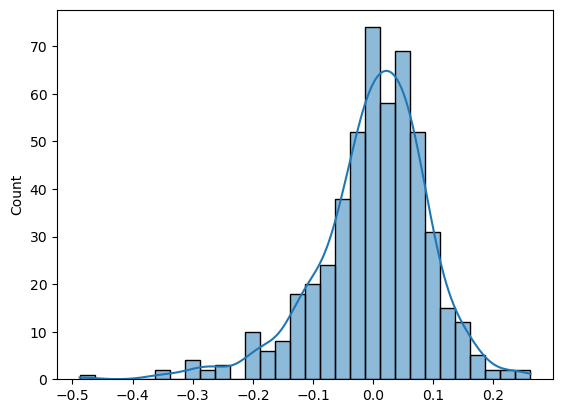

In [226]:
y_train_pred = lm.predict(X_train_rfe)
res = y_train - y_train_pred
sns.histplot(res,kde=True)

<Axes: xlabel='cnt', ylabel='None'>

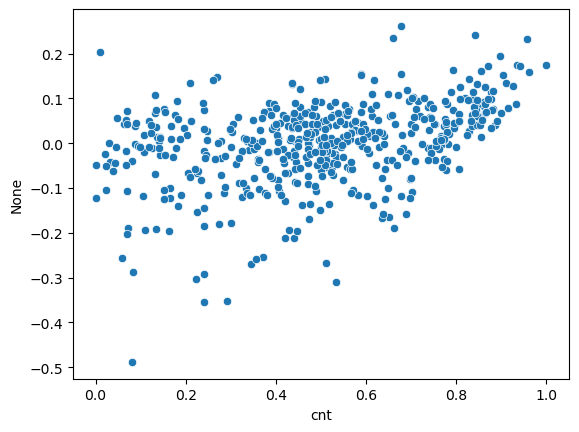

In [236]:
# checking the residual with respect to dependant variable
sns.scatterplot(x=y_train,y=res)

### Predicting and evaluating the test set

In [227]:

df_test = pd.DataFrame(scalar.fit_transform(df_test),columns=df_test.columns)
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.0,0.0,0.536626,0.546708,0.401487,0.313071,0.871675,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.769438,0.735147,0.804036,0.363028,0.558537,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.299316,0.300486,0.555496,0.282038,0.387789,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.439902,0.455298,0.725969,0.001356,0.356967,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.786308,0.758457,0.388742,0.322536,0.857377,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
# instead of manually identifying columns which are dropped, identifying columns which are existing
remaining_columns = [col for col in X_train_rfe.columns if col in df_test.columns]
remaining_columns.append('cnt')
remaining_columns

['workingday',
 'atemp',
 'hum',
 'windspeed',
 'spring',
 'Light weather',
 'Mist weather',
 '2019',
 'Jul',
 'Mar',
 'May',
 'Oct',
 'Sep',
 'Sunday',
 'cnt']

In [231]:
X_test = df_test[remaining_columns]
Y_test = X_test.pop('cnt')
X_test.head()

,workingday,atemp,hum,windspeed,spring,Light weather,Mist weather,2019,Jul,Mar,May,Oct,Sep,Sunday
0,0.0,0.546708,0.401487,0.313071,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.735147,0.804036,0.363028,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.300486,0.555496,0.282038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.455298,0.725969,0.001356,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.758457,0.388742,0.322536,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [232]:
X_test_sm = sm.add_constant(X_test)

In [233]:
y_test_pred = lm.predict(X_test_sm)

In [235]:
r2 = r2_score(y_true=Y_test,y_pred=y_test_pred)
round(r2,3)

0.826

### Final Result
- **Training Data R-squared**: 0.842
- **Training Data Adjusted R-squared**: 0.838
- **Test Data R-sqaured**: 0.826